In [1]:
import pickle as pkl
from hc_lib.plots.figlib import FigureLibrary
import numpy as np
import seaborn as sbn
import copy
import matplotlib as mpl
import matplotlib.pyplot as plt
from hc_lib.plots.container import PostResult

/software/spack-software/2020.05.14/linux-rhel8-ivybridge/gcc-8.4.0/python-3.7.7-zgcjuclie3fiis4ljkrfp4c4j6fkoa62/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
base = '/lustre/cosinga/hcolor/output/'
path = base + 'random_mas_tng100B_099S_0A_800R/results/'
galfile = pkl.load(open(path + 'galaxygrid_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))
hifile = pkl.load(open(path + 'hisubhalogrid_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))
gxhfile = pkl.load(open(path + 'hisubhaloXgalaxy_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))
flib_og = FigureLibrary(galfile, 'pk')
flib_og.addResults(hifile)
flib_og.addResults(gxhfile)

path = base + 'lowgr_tng100B_099S_0A_800R/results/'
galfile = pkl.load(open(path + 'galaxygrid_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))
hifile = pkl.load(open(path + 'hisubhalogrid_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))
gxhfile = pkl.load(open(path + 'hisubhaloXgalaxy_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))
flib_og.addResults(galfile)
flib_og.addResults(hifile)
flib_og.addResults(gxhfile)

# HISUBHALO

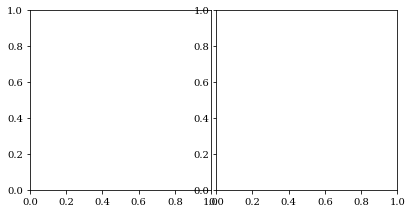

In [52]:
flib = copy.copy(flib_og)
flib.createFigGrid(1,2, panel_length = 2.5)
fig, panels = flib.getFig()

In [53]:
ip = {}; rmp = {}
ip['is_auto'] = True
ip['fieldname'] = 'hisubhalo'
ip['HI_res'] = 'diemer'
rmp['fieldname'] = 'galaxy'
figarr = flib.arrangeResults(ip, 'snapshot', [99], 'space', ['real', 'redshift'], 'mas', rmp)
dim = flib.getDim()
# for i in range(dim[0]):
#     for j in range(dim[1]):
#         idx = (i, j)
#         results = figarr[idx]
#         for r in results:
#             print(r.props['space'])

In [54]:
dim = flib.getDim()
for i in range(dim[0]):
    for j in range(dim[1]):
        idx = (i, j)
        
        flib.plotFill(idx, {'mas':'rCICW'},
                     fill_kwargs = {'color':'cornflowerblue', 'label':'Shuffled'})
        flib.plotFill(idx, {'mas':'CICW'},
                     fill_kwargs = {'color':'orange', 'label':'CICW'})

In [55]:
# axes
flib.xLimAdjustToNyquist()
flib.flushYAxisToData()
flib.matchAxisLimits()
flib.logAxis()

# ticks
flib.removeDefaultTickLabels()
flib.changeTickParams({'labelsize':12})

# labels
colkw = {'fontsize':14}
legkw = {'fontsize':12, 'loc':'center right'}
# flib.colLabels(['Real Space', 'Redshift Space'])
axiskw = {'fontsize':14}
xpos = [0.5, flib.yborder[0]/2/flib.figsize[1]]
ypos = [flib.xborder[0]/3/flib.figsize[0], 0.5]
flib.colLabels(['Real Space', 'Redshift Space'], txt_kwargs = colkw)
flib.addLegend(kwargs = legkw)
flib.axisLabel('x', pos = xpos, txt_kwargs = axiskw)
axiskw['rotation'] = 'vertical'
flib.axisLabel('y', pos = ypos, subscript = '\\rm{HI}', txt_kwargs = axiskw)

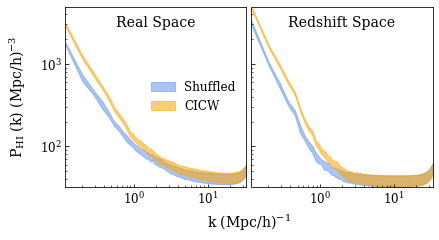

In [56]:
fig

Shuffling the HI makes a very small difference, likely just due to the large-scale changes of where the mass is going. Since there already wasn't a ton of HI clustering within halos anyway (as the most clustered environments tend not to have a lot of it), the mid-k ranges don't change as much.

In [57]:
fig.savefig('hisubhalo_auto_random_mas.png')

# GALAXY

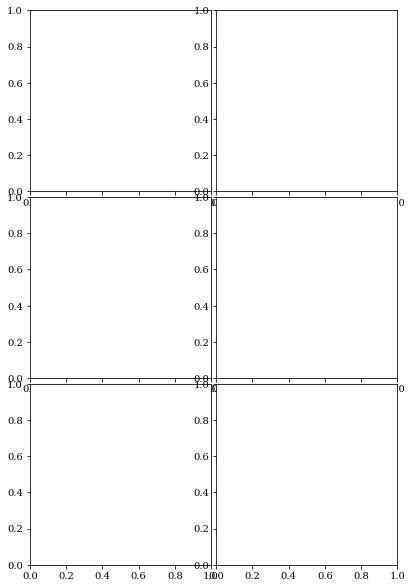

In [58]:
flib = copy.copy(flib_og)
flib.createFigGrid(3, 2, panel_length = 2.5)
fig, panels = flib.getFig()

In [59]:
ip = {}; rmp = {}
ip['is_auto'] = True
ip['fieldname'] = 'galaxy'
ip['gal_res'] = 'diemer'
ip['color_cut'] = ['0.60', 'None']
ip['species'] = 'stmass'
rmp['fieldname'] = 'hisubhalo'
figarr = flib.arrangeResults(ip, 'color', ['resolved', 'blue', 'red'], 'space', ['real', 'redshift'], 'mas', rmp)
# dim = flib.getDim()
# for i in range(dim[0]):
#     for j in range(dim[1]):
#         idx = (i, j)
#         results = figarr[idx]
#         for r in results:
#             print(r.props['mas'])

rCICW
CICW
rCICW
CICW
rCICW
CICW
rCICW
CICW
rCICW
CICW
rCICW
CICW


In [60]:
colors = ['gray', 'blue', 'red']
# labels = ['All Galaxies', 'Blue Galaxies', 'Red Galaxies']
dim = flib.getDim()
for i in range(dim[0]):
    for j in range(dim[1]):
        idx = (i, j)
        
        flib.plotLine(idx, 'rCICW',
                     line_kwargs = {'color':colors[i], 'label':'Shuffled', 'linestyle':'--'})
        flib.plotLine(idx, 'CICW',
                     line_kwargs = {'color':colors[i], 'label':'CICW'})

In [61]:
# axes
flib.xLimAdjustToNyquist()
flib.flushYAxisToData()
flib.matchAxisLimits()
flib.logAxis()

# ticks
flib.removeDefaultTickLabels()
flib.changeTickParams({'labelsize':12})

# labels
colkw = {'fontsize':14}
legkw = {'fontsize':12, 'loc':'center right'}
# flib.colLabels(['Real Space', 'Redshift Space'])
axiskw = {'fontsize':14}
xpos = [0.5, flib.yborder[0]/2/flib.figsize[1]]
ypos = [flib.xborder[0]/3/flib.figsize[0], 0.5]
flib.colLabels(['Real Space', 'Redshift Space'], txt_kwargs = colkw)
flib.addLegend(kwargs = legkw)
flib.axisLabel('x', pos = xpos, txt_kwargs = axiskw)
axiskw['rotation'] = 'vertical'
flib.axisLabel('y', pos = ypos, subscript = '\\rm{gal}', txt_kwargs = axiskw)

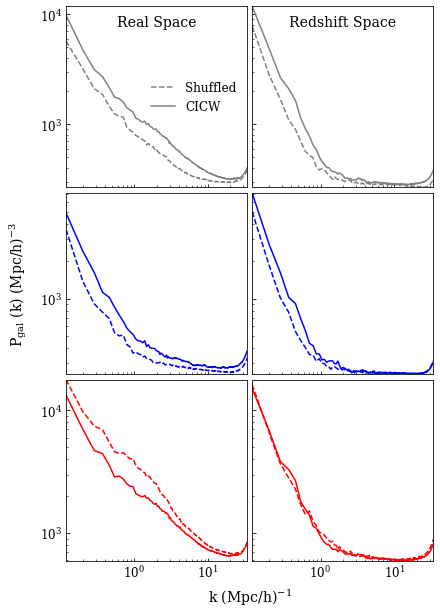

In [62]:
fig

Figure Interpretation:

Looking at the galaxy bin plots, both all and blue galaxies have slight decreases in power on all scales. On large-scales, Here the idea is that the *mass-weighted number* of galaxies in the all and blue galaxies get most of their contribution in the middle mass galaxies, ~10^9-10^10 solar masses, which typically are centrals of their respective systems. Exchanging the centrals affects the weighting but negligibly affects the shape of the power spectrum, as how the galaxies occupy their halos doesn't fundamentally change.

For **red galaxies** however the exchange ends up being much more complicated. Red galaxies have significantly more mass-weighted contribution on the high-mass end (10^10-10^11 stellar mass), thus the power is dominated by where these galaxies are placed. Most, if not all, of the galaxies at that end do *not* coexist in the same halo, as there would not be enough mass to support a binary system of that size. However, in any individual halo with a red central, one should expect several accompanying smaller red satellites. So the likelihood that two massive red galaxies are shuffled into the same halo is inflated as compared to the standard case, raising the power instead of lowering it. I think the fact that at the mid-k range, within clusters, the difference between the two grows supports that thought process. 

I'm unsure why the redshift-space case sees nearly no difference - I think that the RSD just happens to cancel out the increase in power from the shuffling. Since the massive galaxies are more likely to replace satellites, the RSD should also be stronger in the shuffled case. 

In [63]:
fig.savefig('galaxy_auto_random_mas.png')

# HI - GALAXY CROSS-POWER

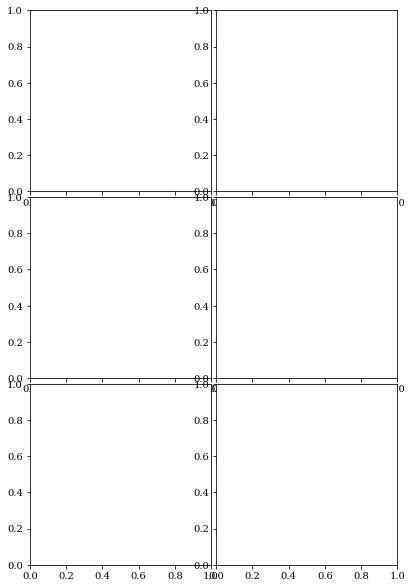

In [88]:
flib = copy.copy(flib_og)
flib.createFigGrid(3, 2, panel_length = 2.5)
fig, panels = flib.getFig()

In [89]:
ip = {}; rmp = {}
ip['is_auto'] = False
ip['gal_res'] = 'diemer'
ip['HI_res'] = 'diemer'
ip['color_cut'] = ['0.60', 'None']
ip['species'] = 'stmass'
figarr = flib.arrangeResults(ip, 'color', ['resolved', 'blue', 'red'], 'space', ['real', 'redshift'], 'mas', rmp)
# dim = flib.getDim()
# for i in range(dim[0]):
#     for j in range(dim[1]):
#         idx = (i, j)
#         results = figarr[idx]
#         for r in results:
#             print(r.props['model'], r.props['mas'], r.props['color'])

In [90]:
shuffle_colors = ['silver', 'cornflowerblue', 'tomato']
cicw_colors = ['gray', 'blue', 'red']
dim = flib.getDim()
for i in range(dim[0]):
    for j in range(dim[1]):
        idx = (i, j)
        
        flib.plotFill(idx, {'mas':'rCICW'},
                     fill_kwargs = {'color':shuffle_colors[i], 'label':'Shuffled', 'alpha':0.3})
        flib.plotFill(idx, {'mas':'CICW'},
                     fill_kwargs = {'color':cicw_colors[i], 'label':'CICW'})

In [91]:
# axes
flib.xLimAdjustToNyquist()
flib.flushYAxisToData()
flib.matchAxisLimits()
flib.logAxis()

# ticks
flib.removeDefaultTickLabels()
flib.changeTickParams({'labelsize':12})

# labels
colkw = {'fontsize':14}
legkw = {'fontsize':12, 'loc':'lower left'}
# flib.colLabels(['Real Space', 'Redshift Space'])
axiskw = {'fontsize':14}
xpos = [0.5, flib.yborder[0]/2/flib.figsize[1]]
ypos = [flib.xborder[0]/3/flib.figsize[0], 0.5]
flib.colLabels(['Real Space', 'Redshift Space'], txt_kwargs = colkw)
flib.addLegend(kwargs = legkw)
flib.axisLabel('x', pos = xpos, txt_kwargs = axiskw)
axiskw['rotation'] = 'vertical'
flib.axisLabel('y', pos = ypos, subscript = '\\rm{HI-gal}', txt_kwargs = axiskw)

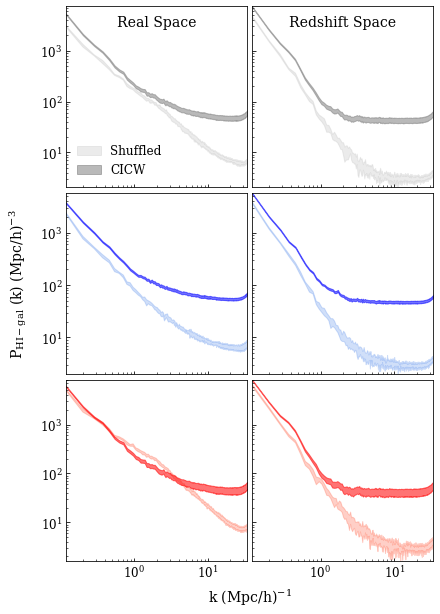

In [92]:
fig

Figure Interpretation:

The real space all galaxy power spectrum can see contributions from both red and blue galaxies